<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/tvae_0914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept drift로 인한 모델 성능 저하의 정량적 추정 방법 (2) <br>

Quantitative performance estimation method for model performance degradation due to concept drift

## Laos project!!!

# 1. Abstract

* 기계학습을 통해 학습된 모델은 업무 활용 시 그 성능을 실측하기 매우 어렵다 . 때문에 운영 부서에서는 모델의 성능을 효과적으로 관리하지 못한다. 이로 인해 모델의 상태를 판단하기 위한 Concept drift 탐지 방법이 다양하게 연구되고 있다 .
* 운영 부서에서는 운영 중인 모델의 성능을 정량적으로 관리하려고 한다 . 그러나 Concept drift 는 모델 상태를 데이터 관계적으로 판단 할 뿐 , 모델의 정량적 성능 수치를 추정하지는 못 한다.
* 본 연구에서는 Concept drift 의 통계량을 통해 정량적으로 precision 값을 추정하
는 성능 예측 모델을 제안한다.
* 제안 모델은 정답 라벨을 포함하는 테스트데이터셋에서 정답을 맞춘 데이터와 틀린데이터의 비율을 임의 조정한 샘플데이터셋을 복수 생성하고 각 데이터셋의 Drift 통계량과 성능의 관계를 학습한다. 이후 실제 유입되는 데이터셋의 Drift 통계량을 측정하고 이를 제안 모델에 대입하여 성능을 추정한다.
* Drift 를 임의 주입한 가상데이터셋을 통해 학습한 가상 비즈니스 모델에 적용하여 제안 모델의 적합성을 확인하고 현실 비즈니스에서 사용될 수 있는 대출 심사 모델과 신용카드 오사용 탐지 모델 을 통해 제안 모델의 성능 예측 유효성을 확인한다.












# 3. Proposed Method

## 개념도

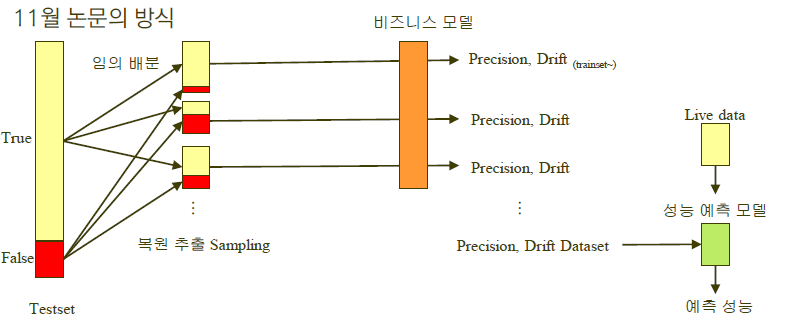

## pseudo code

--------------------------------------------------------------------------------
**Step1 : performance modeling**

--------------------------------------------------------------------------------
&nbsp;&nbsp;1:&nbsp;&nbsp;$L_{trainset} =  \{ Y_L, X_L\} $ #이하 간략히 $L$ 로 표기 <br>

&nbsp;&nbsp;2:&nbsp;&nbsp;$L_{testset} =  \{ Y_T, X_T\} $<br>
&nbsp;&nbsp;3:&nbsp;&nbsp;$f(x,L) = train(Y_L, X_L)$ <br>
&nbsp;&nbsp;4:&nbsp;&nbsp;$base\_score = score(f(X_T,L),Y_T)$<br>
&nbsp;&nbsp;5:&nbsp;&nbsp;$For$ number_of_sample $do $<br>
&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $α = random\_gaussian(mean=base\_score,std=sample\_scale)$<br>
&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $if \  α > base\_score$<br>
&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $α = 2 base\_score - α$<br>
&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $end$<br>
&nbsp;&nbsp;10:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_{s(true)}, X_{s(true)} = random\_sampling(L_{testset(true)}, size=α*count(L_{testset(false)}) / (1-α))$<br>
&nbsp;&nbsp;11:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_{s(false)}, X_{s(false)} = L_{testset(false)}$<br>
&nbsp;&nbsp;12:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_s, X_s = shuffle(Y_{s(true)},Y_{s(false)}, X_{s(true)},X_{s(false)})$<br>

&nbsp;&nbsp;13:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift\_array \leftarrow KS\_Test(X_L, X_s)$<br>
&nbsp;&nbsp;14:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$score\_array \leftarrow score(f(X_s,L),Y_s))$<br>
&nbsp;&nbsp;15:&nbsp;&nbsp;$end$ <br>
&nbsp;&nbsp;16:&nbsp;&nbsp;$ppm(drift) = train(score\_array, drift\_array)$

--------------------------------------------------------------------------------
**Step2 : apply perfomance_model**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$l_{Input\_live\_data} =\{ X_l\}$ # live data에는 Y가 존재하지 않는다.<br>
2:&nbsp;&nbsp;$drift = KS\_Test(X_L, X_l)$ <br>
3:&nbsp;&nbsp;$score_{predicted} = ppm(drift)$

## 설명

성능 예측 대상의 모델을 $f(x,L)$이라 할 때,

trainset과 testset은 $f(x,L)$의 학습 및 성능 측정을 위해 활용된 데이터에 해당.<br>
testset을 통하여 $f(x,L)$의 성능, base_score이 측정되었다.

<b>Step1 : 성능 모델링 단계</b> <br>
1. mean=base_score, std=sample_scale 으로 gaussian 확률값, α을 random 하게 취한다.
2. mean=base_score 이므로, base_score의 우측 α값이 취득된 경우, α=2base_score−α 으로 보정한다.
3. 이는 gaussian 분포의 우측을 접어서 좌측만 남겨놓은 것과 같다.
4. $L_{testset}$ 중 모델 $f(x,L)$에 의해 Y 맞춘 set을 $L_{testset(true)}$, 틀린 set을 $L_{testset(false)}$ 라 한다면,
5. $L_{testset(true)}$ 에서 $α∗count(L_{testset(false)})/(1−α)$ 개수 만큼, 임의 추출한다.
6. $L_{testset(true)}$ 에 $L_{testset(false)}$ 을 혼합한 Sample dataset, $Y_s,X_s$ 을 만든다.
7. $Y_s,X_s$를 모델 $f(x,L)$에 대입하면, 취득한 gaussian 확률값 α에 해당하는 precision을 갖는다.
8. trainset $X_L$ 대비, $X_s$의 KS_Test 통계량(drift)을 취득하여 drift_array에 저장한다.
9. $Y_s,X_s$를 모델 $f(x,L)$에 대입하여 취득한 precision을 score_array에 저장한다.
10. 주어진 회수 만큼 반복하여 score,drift pair의 dataset을 구성한다.
11. 위의 dataset을 학습하여 성능예측모델(ppm)을 학습한다.

<b>Step2 : $ppm(drift)$의 적용 단계</b><br>
1. 일정기간 축적한 실 dataset ($X_l$)를 취득한다.
2. trainset($X_L$)과 실 dataset ($X_l$)에 대해 Kolmogorov–Smirnov test를 하여, drift통계량을 취득한다.
3. $ppm(drift)$을 통해 예측 precision을 구한다.


# 4. 실험 계획

*   Data
1. Synthatic Data
> Drift가 유도된 가상의 생성 데이터 사용<BR>
> 100,000건, 10개의 feature, 0/1의 Y <BR>

2. Personal Loan Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>
>> trainset : 11,497건 (2010년)<BR>
>> online dataset : 1,268,183건 (2011~2017년)<BR>

* 예측 알고리즘
> Random-forest <BR>

* 성능 예측 알고리즘
> Ordinary Least Squares regression

* 실험의 변수
> Sampling_scale<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표 : R_square<br>


# 5. 실험을 위한 기본 준비

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
np.random.seed(1337)

In [2]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)


# 7. loan predict 실험

## 데이터 구축

In [3]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

<ipython-input-3-9b4d5ff8fbde>:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")


(2260701, 151)


### 데이터 정제

In [4]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [5]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [6]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [7]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [8]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [9]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [10]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [11]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [12]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [13]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [14]:
df_accepted.shape

(1341026, 86)

In [15]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [16]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [17]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [18]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [19]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [20]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [21]:
X = {}
Y = {}

In [22]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


<ipython-input-22-2f19b37cda33>:6: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()


In [23]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [24]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [25]:
X[2010].shape

(11497, 81)

In [26]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [27]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

## 예측 모델 구축

In [28]:
ML = {}
scaler = MinMaxScaler()

In [29]:
MODEL_TYPE = 'RF'  ## RF / DL

### random forest 모델

In [30]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [31]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

### loan predict model build

In [32]:
seed_everything()

offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [33]:
dd = np.zeros((4,4))
# add intercept term
intc = np.ones((dd.shape[0],1))
dd = np.concatenate((dd,intc),axis=1)
dd.shape

(4, 5)

In [34]:
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf, ML[2010].predict(scaler.transform(x_inf)),average='binary')
base_score

(0.9908045977011494, 1.0, 0.9953810623556583, None)

In [35]:
x_inf.shape

(3450, 81)

In [36]:
x_ref.shape

(8047, 81)

In [37]:
y_hat = ML[2010].predict(scaler.transform(x_inf))

In [38]:
y_inf

array([0, 1, 1, ..., 1, 1, 1])

In [39]:
false_x = []
true_x = []

inx = 0
for yt,yp in zip(y_inf,y_hat):
    if yt == yp:
        true_x.append(np.append(x_inf[inx],yt))
    else:
        false_x.append(np.append(x_inf[inx],yt))
    inx = inx + 1

true_x = np.asarray(true_x)
false_x = np.asarray(false_x)


In [40]:
true_x.shape

(3422, 82)

In [41]:
false_x.shape

(28, 82)

In [42]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)

    if ks_stat == minS:
        ks_stat = -ks_stat

    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [43]:
importances = ML[2010].feature_importances_
importances = importances/sum(importances)

l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True)

top = 30

toplist = [int(w) for w in np.asarray(l[0:top])[:,2]]

toplist

[15,
 17,
 16,
 14,
 2,
 1,
 80,
 6,
 13,
 11,
 3,
 10,
 12,
 0,
 7,
 4,
 9,
 8,
 72,
 43,
 55,
 27,
 39,
 5,
 66,
 59,
 62,
 49,
 40,
 77]

## loan predict model의 성능 예측 실험

In [44]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016])) #,X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016])) #,Y[2017]))

In [45]:
print("trainset:",X[2010].shape)
print("online dataset:",X2.shape)

trainset: (11497, 81)
online dataset: (1099816, 81)


In [46]:
aa = np.random.normal(loc=98.0, scale=20.0, size=1000) /100
aa = [c if c < 0.98 else 0.98*2 - c for c in aa]

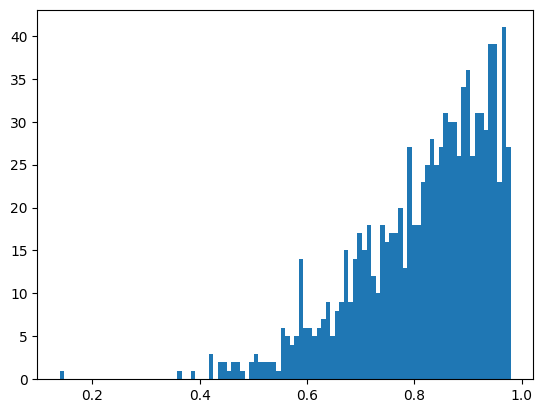

In [47]:
plt.hist(aa,bins=100)
plt.show()

## 생성 TVAE

In [57]:
!pip install sdv==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: copulas
    Found existing installation: copulas 0.9.1
    Uninstalling copulas-0.9.1:
      Successfully uninstalled copulas-0.9.1
  Attempting uninstall: sdmetrics
    Found existing installation: sdmetrics 0.11.0
    Uninstalling sdmetrics-0.11.0:
      Successfully uninstalled sdmetrics-0.11.0
  Attempting uninstall: sdv
    Found existing installation: sdv 1.4.0
    Uninstalling sdv-1.4.0:
      Successfully uninstalled sdv-1.4.0


In [48]:
ref_df = pd.DataFrame(x_ref,columns=COLUMNS)

In [49]:
ref_df

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,OTHER,OWN,RENT,DirectPay,Y
0,12000.0,36.0,13.57,42000.0,21.77,0.0,684.0,2.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7500.0,36.0,12.18,26000.0,0.00,0.0,764.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10000.0,36.0,14.61,62400.0,8.46,0.0,714.0,1.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,15000.0,36.0,16.00,96000.0,11.13,2.0,664.0,2.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20000.0,36.0,11.83,105000.0,13.87,0.0,759.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,3500.0,36.0,9.62,51996.0,9.12,0.0,694.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8043,15000.0,36.0,14.09,81996.0,8.03,0.0,679.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8044,12500.0,36.0,9.62,110000.0,5.13,0.0,709.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8045,7000.0,36.0,9.62,53800.0,13.29,0.0,719.0,0.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
ref_df['loan_paid'] = y_ref

In [52]:
from sdv.tabular import TVAE

tvae_model = TVAE()
tvae_model.fit(ref_df[['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate','loan_paid']])

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'total_rec_late_fee'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/

In [67]:
new_data = tvae_model.sample(200)

In [68]:
new_data

,recoveries,last_fico_range_high,last_pymnt_amnt,total_rec_late_fee,int_rate,loan_paid
0,0.423432,646.0,274.06,0.000000,13.42,1
1,0.116643,678.0,44.60,0.000000,16.08,1
2,0.000000,699.0,372.17,0.000000,7.73,1
3,0.000000,625.0,188.74,0.018684,15.08,1
4,0.000000,769.0,133.86,0.014216,7.88,1
...,...,...,...,...,...,...
195,0.060977,611.0,137.31,0.000000,14.80,1
196,0.000000,614.0,209.77,0.003733,13.41,1
197,0.479033,648.0,1104.30,0.000000,14.94,1
198,0.000000,750.0,128.15,0.009329,6.98,1


## 실험

In [77]:
import statsmodels.api as sm

def ppm_build(scale = 10.0,epoch =1000):
    scores = []
    drifts = []

    #sample_size = false_x.shape[0] * ratio
    #aa = np.random.randint(1,sample_size,epoch)
    #perf = np.random.randint(10,int(base_score[0]*100),epoch)/100
    base = base_score[0]*100
    perf = np.random.normal(loc=base, scale=scale, size=epoch)
    perf = np.asarray([c if c < base else base*2 - c for c in perf]) /100

    for i in range(epoch):
        #tx = true_x[np.random.choice(true_x.shape[0], sample_size, replace=True)[0:aa[i]],:]
        #tx = true_x[np.random.choice(true_x.shape[0], int((perf[i] * false_x.shape[0]) /(1 - perf[i])), replace=True),:]
        #fx = false_x #np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #fx = np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #tx = true_x[np.random.choice(true_x.shape[0], fx.shape[0] * ratio, replace=True)[0:np.random.randint(1,fx.shape[0] * ratio,1)[0]],:]
        #ffx = np.concatenate((tx,fx))
        #np.random.shuffle(ffx)

        ffx = tvae_model.sample(200).values

        tx = ffx[:,0:5]
        ty = ffx[:,5]
        f1 = precision_recall_fscore_support(ty, ML[2010].predict(scaler.transform(tx)),average='binary')
        #x_ref2 = np.random.permutation(x_ref)[0:tx.shape[0]]
        drift = __ks_drift(ref_df[['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate']].values,tx)
        scores.append(f1[0])
        drifts.append(np.append(drift[:,0],1))
        print(f"\r{i+1}/{epoch} precision:{f1[0]:.4f} drift:{drift[0,0]:.4f}", end="", flush=True)

    plt.hist(scores, bins = 100)
    plt.show()

    model = sm.OLS(scores, drifts).fit()
    print('Model R^2:',model.rsquared)
    #print(model.summary())
    return model

In [73]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(ref_df[['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate']])
y_train = y_ref #get_one_hot(y,2)
ML[2010] = RandomForestClassifier(n_estimators=80,max_depth=5)
ML[2010].fit(X_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=80)

In [74]:
from sklearn.metrics import r2_score
import math

def test1(model):
    result = {}
    result['precision'] = []
    result['predicted'] = []
    window_size = 5000
    step = 2500
    predicted = 0
    batch = math.ceil((X2.shape[0]-window_size)/step)
    for i in range(batch):
        ux = X2[i*step:i*step+window_size]
        uy = Y2[i*step:i*step+window_size]
        if scaler is not None:
            f1 = precision_recall_fscore_support(uy, ML[2010].predict(scaler.transform(ux)),average='binary')
        else:
            f1 = precision_recall_fscore_support(uy, ML[2010].predict(ux),average='binary')

        drift = __ks_drift(x_ref,ux)
        precision = f1[0]
        predicted1 = model.predict(np.append(drift[:,0],1))[0]
        if abs(predicted1-predicted) > 0.1 and predicted > 0:
            predicted1 = predicted
        result['precision'].append(precision)
        result['predicted'].append(predicted1)
        print(f"\r{i+1}/{batch} precision:{precision:.4f} predicted:{predicted1:.4f}", end="", flush=True)
        predicted = predicted1

    R2 = r2_score(result['precision'],result['predicted'])
    print('')
    print('R2:',R2)
    result_df = pd.DataFrame(result)
    result_df.plot()
    plt.show()
    return R2, result_df

In [75]:
def result_visualization(Exp,scale,df3,result_data):
    for key, value in result_data.items():
        mean = np.mean(value)
        error_rate = 1.96 * np.std(value) / math.sqrt(len(result_data))
        print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

    df4 = pd.DataFrame(df3)
    colums = []
    for trial in result_data['Trial']:
        colums.append(f'predicted {trial}')

    mean_r_2 = np.mean(result_data['R2'])
    print('Mean R^2 (sum(r2)/N) :',mean_r_2)
    df4['max predicted precision'] = df4[colums].max(axis=1)
    df4['mean predicted precision'] = df4[colums].mean(axis=1)
    df4['min predicted precision'] = df4[colums].min(axis=1)

    mean_r_2 = r2_score(df4['real precision'],df4['mean predicted precision'])
    print('Mean R^2 (real,mean predict) :',mean_r_2)
    df4[['real precision','mean predicted precision']].plot(title=f'Exp:{Exp+1}, Sampling_scale:{scale}, Mean R^2:{mean_r_2:.4f}', figsize=(8,8))
    plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
    plt.show()

Exp 1, Trial 1
1000/1000 precision:0.9744 drift:0.4927

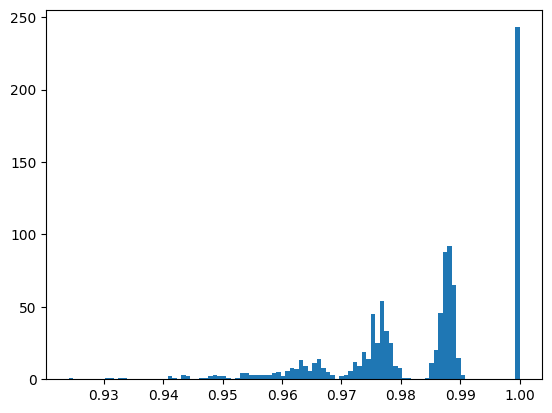

Model R^2: 0.022338156283741584


ValueError: ignored

In [79]:
import warnings
warnings.filterwarnings('ignore')

seed_everything()

scales = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for Exp in range(len(scales)):
    df3 = {}
    result_data = {}
    result_data['R2'] = []
    result_data['Trial'] = []
    #result_dfs = []
    experimant_count = 5
    scale = scales[Exp]
    for trial in range(experimant_count):
        print(f'Exp {Exp+1}, Trial {trial+1}')
        model = ppm_build(scale = scale,epoch =1000)
        R2, result_df = test1(model)
        #if R2 > -10.0:
        result_data['R2'].append(R2)
        result_data['Trial'].append(trial)
        df3['real precision'] = result_df['precision'].values
        df3[f'predicted {trial}'] = result_df['predicted'].values
        #else:
        #    print('==== Discard this experiment.====')

    result_visualization(Exp,scale,df3,result_data)

# 8. Credit card 실험

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:

!kaggle datasets download "ealtman2019/credit-card-transactions"

 93% 246M/263M [00:01<00:00, 253MB/s]
100% 263M/263M [00:01<00:00, 200MB/s]


In [ ]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [ ]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [ ]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1})

In [ ]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


In [ ]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)
df['Merchant State']=df['Merchant State'].fillna('NAN')
df['Merchant City']=df['Merchant City'].fillna('NAN')
df['is vozmes']=df['Amount'].apply(lambda value: value<0)
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

#encoding categorial features
le=LabelEncoder()
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

df = df.sort_values(['Year','Month','Day'])

df.Year.value_counts()

2016    60463
2018    59869
2015    59843
2019    59318
2017    58032
2013    57109
2014    57079
2012    54883
2010    53532
2011    52353
2009    46284
2008    44527
2007    37215
2006    31268
2005    24924
2004    20564
2003    15614
2002    11744
2020    11240
2001     8833
2000     6051
1999     3961
1998     2543
1997     1706
1996     1001
1995      716
1994      469
1993      291
1992      179
1991       50
Name: Year, dtype: int64

In [ ]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[(df['Year']==2005) |(df['Year']==2006) | (df['Year']==2007)].drop(drop_columns,axis=1)
y = df[(df['Year']==2005) |(df['Year']==2006) | (df['Year']==2007)]['Is Fraud?']
#X = X[37215-10000:]
#y = y[37215-10000:]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68483 entries, 6230481 to 17300720
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        68483 non-null  int64  
 1   Amount      68483 non-null  float64
 2   Use Chip    68483 non-null  int64  
 3   MCC         68483 non-null  int64  
 4   is online   68483 non-null  int64  
 5   Hour        68483 non-null  int64  
 6   is vozmes   68483 non-null  int64  
 7   abs_amount  68483 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 4.7 MB


In [ ]:
X.shape

(68483, 8)

In [ ]:
offset = int(y.values.shape[0] * 0.8)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [ ]:
x_inf.shape[0]

20545

## 예측모델 구축
Catboost 모델

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 120 kB/s 


## Credit card fraud transaction detect model build

In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier

seed_everything()

cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False)
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))

Learning rate set to 0.064999
0:	learn: 0.5832781	total: 11.1ms	remaining: 11.1s
1:	learn: 0.4869797	total: 23.1ms	remaining: 11.5s
2:	learn: 0.4168271	total: 33.2ms	remaining: 11s
3:	learn: 0.3591501	total: 42.9ms	remaining: 10.7s
4:	learn: 0.3136940	total: 54.2ms	remaining: 10.8s
5:	learn: 0.2774327	total: 64.5ms	remaining: 10.7s
6:	learn: 0.2494880	total: 73.1ms	remaining: 10.4s
7:	learn: 0.2242667	total: 83.6ms	remaining: 10.4s
8:	learn: 0.2042412	total: 95.3ms	remaining: 10.5s
9:	learn: 0.1887272	total: 108ms	remaining: 10.7s
10:	learn: 0.1746107	total: 120ms	remaining: 10.8s
11:	learn: 0.1638103	total: 130ms	remaining: 10.7s
12:	learn: 0.1540082	total: 141ms	remaining: 10.7s
13:	learn: 0.1460431	total: 152ms	remaining: 10.7s
14:	learn: 0.1397059	total: 162ms	remaining: 10.7s
15:	learn: 0.1353724	total: 169ms	remaining: 10.4s
16:	learn: 0.1304151	total: 181ms	remaining: 10.5s
17:	learn: 0.1259733	total: 192ms	remaining: 10.5s
18:	learn: 0.1229915	total: 206ms	remaining: 10.7s
19:	

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred))
print(roc_auc_score(y_inf, y_pred))

0.6004250797024442
0.7186404027450305


In [ ]:
x_ref.shape

(74725, 8)

## Credit card fraud transaction detect model 성능 예측 실험

In [ ]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
Y2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [ ]:
from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm # import statsmodels
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17395
           1       0.95      0.44      0.60      1287

    accuracy                           0.96     18682
   macro avg       0.95      0.72      0.79     18682
weighted avg       0.96      0.96      0.95     18682



In [ ]:
base_score

(0.9495798319327731, 0.439005439005439, 0.6004250797024442, None)

## 실험

In [ ]:
y_hat = y_pred

In [ ]:
false_x = []
true_x = []

inx = 0
for yt,yp in zip(y_inf,y_hat):
    if yt == yp:
        true_x.append(np.append(x_inf[inx],yt))
    else:
        false_x.append(np.append(x_inf[inx],yt))
    inx = inx + 1

true_x = np.asarray(true_x)
false_x = np.asarray(false_x)


In [ ]:
false_x.shape

(868, 9)

In [ ]:
true_x.shape

(19677, 9)

In [ ]:
base = base_score[0]*100
perf = np.random.normal(loc=base, scale=1.0, size=10000)
perf = np.asarray([c if c < base else base*2 - c for c in perf]) /100

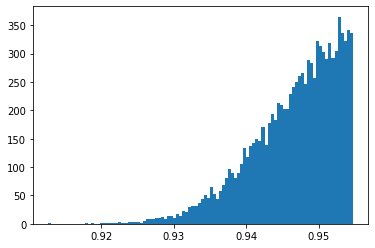

In [ ]:
plt.hist(perf,bins=100)
plt.show()

In [ ]:
import statsmodels.api as sm

def ppm_build2(scale = 10.0,epoch =1000):
    scores = []
    drifts = []

    #sample_size = false_x.shape[0] * ratio
    #aa = np.random.randint(1,sample_size,epoch)
    #perf = np.random.randint(10,int(base_score[0]*100),epoch)/100
    base = base_score[0]*100
    perf = np.random.normal(loc=base, scale=scale, size=epoch)
    perf = np.asarray([c if c < base else base*2 - c for c in perf]) /100

    for i in range(epoch):
        #tx = true_x[np.random.choice(true_x.shape[0], sample_size, replace=True)[0:aa[i]],:]
        tx = true_x[np.random.choice(true_x.shape[0], int((perf[i] * false_x.shape[0]) /(1 - perf[i])), replace=True),:]
        fx = false_x #np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #fx = np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #tx = true_x[np.random.choice(true_x.shape[0], fx.shape[0] * ratio, replace=True)[0:np.random.randint(1,fx.shape[0] * ratio,1)[0]],:]
        ffx = np.concatenate((tx,fx))
        np.random.shuffle(ffx)
        tx = ffx[:,0:8]
        ty = ffx[:,8]
        f1 = precision_recall_fscore_support(ty,cat.predict(tx),average='binary')
        #x_ref2 = np.random.permutation(x_ref)[0:tx.shape[0]]
        #print(x_ref.shape, tx.shape)
        #drift = __ks_drift(x_ref[np.random.choice(x_ref.shape[0],tx.shape[0], replace=False),:],tx)
        drift = __ks_drift(x_ref,tx)
        #scores.append(f1[0])
        scores.append(perf[i]+0.1)
        drifts.append(np.append(drift[:,0],0))
        print(f"\r{i+1}/{epoch} precision:{f1[0]:.4f} drift:{drift[0,0]:.4f}", end="", flush=True)

    plt.hist(scores, bins = 100)
    plt.show()

    model = sm.OLS(scores, drifts).fit()
    print('Model R^2:',model.rsquared)
    print(model.summary())
    return model

In [ ]:
from sklearn.metrics import r2_score
import math

def test2(model):
    result = {}
    result['precision'] = []
    result['predicted'] = []
    window_size = 20000
    step = 1000
    predicted = 0
    batch = math.ceil((X2.shape[0]-window_size)/step)
    for i in range(batch):
        ux = X2[i*step:i*step+window_size]
        uy = Y2[i*step:i*step+window_size]
        f1 = precision_recall_fscore_support(uy, cat.predict(ux),average='binary')

        #print(x_ref.shape, ux.shape)
        drift = __ks_drift(x_ref,ux.values)
        precision = f1[0]
        #predicted1 = model.predict(np.append(drift[:,0],0))[0]
        predicted1 = model.predict(np.append(drift[:,0],0))[0]
        if abs(predicted1-predicted) > 0.1 and predicted > 0:
            predicted1 = predicted
        result['precision'].append(precision)
        result['predicted'].append(predicted1)
        print(f"\r{i+1}/{batch} precision:{precision:.4f} predicted:{predicted1:.4f}", end="", flush=True)
        predicted = predicted1

    R2 = r2_score(result['precision'],result['predicted'])
    print('')
    print('R2:',R2)
    result_df = pd.DataFrame(result)
    result_df.plot()
    plt.show()
    return R2, result_df

Exp 1, Trial 1
1000/1000 precision:0.9312 drift:-0.0338

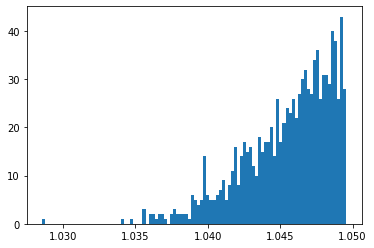

Model R^2: 0.9977316425890391
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.240e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:00:33   Log-Likelihood:                          1580.9
No. Observations:                1000   AIC:                                     -3148.
Df Residuals:                     993   BIC:                                     -3113.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.3700
R2: -1.094973128685444


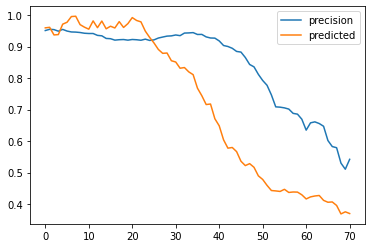

Exp 1, Trial 2
1000/1000 precision:0.9287 drift:-0.0306

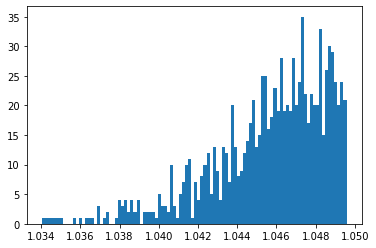

Model R^2: 0.9977759741392119
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.364e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:03:30   Log-Likelihood:                          1590.6
No. Observations:                1000   AIC:                                     -3167.
Df Residuals:                     993   BIC:                                     -3133.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.3974
R2: -0.8737793917969958


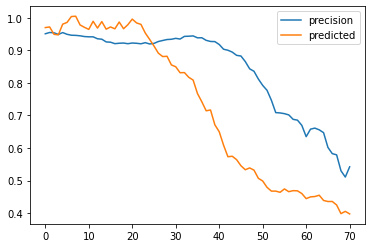

Exp 1, Trial 3
1000/1000 precision:0.9294 drift:-0.0293

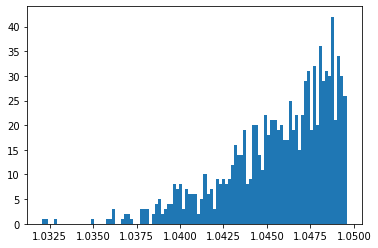

Model R^2: 0.9977789411095233
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.373e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:06:27   Log-Likelihood:                          1591.3
No. Observations:                1000   AIC:                                     -3169.
Df Residuals:                     993   BIC:                                     -3134.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.3934
R2: -0.8994181235272538


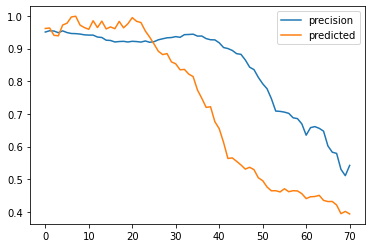

Exp 1, Trial 4
1000/1000 precision:0.9374 drift:-0.0302

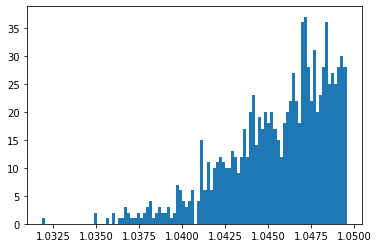

Model R^2: 0.9977092945014081
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.179e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:09:24   Log-Likelihood:                          1575.9
No. Observations:                1000   AIC:                                     -3138.
Df Residuals:                     993   BIC:                                     -3103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.4072
R2: -0.8075409828267928


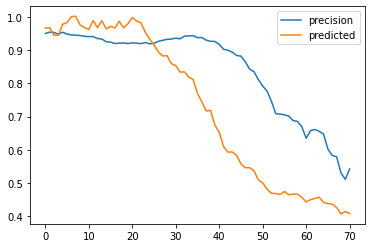

Exp 1, Trial 5
1000/1000 precision:0.9310 drift:-0.0371

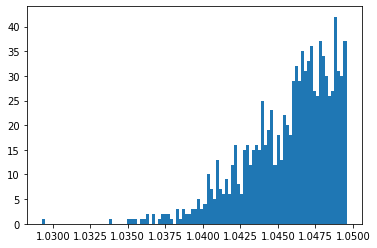

Model R^2: 0.9978915939604792
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.714e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:12:21   Log-Likelihood:                          1617.3
No. Observations:                1000   AIC:                                     -3221.
Df Residuals:                     993   BIC:                                     -3186.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.3504
R2: -1.2772837113915925


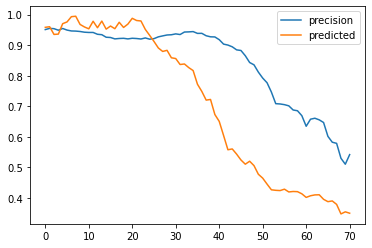

R2:-0.9906 +- 0.2389
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : -0.9905990676456158
Mean R^2 (real,mean predict) : -0.9837284204007206


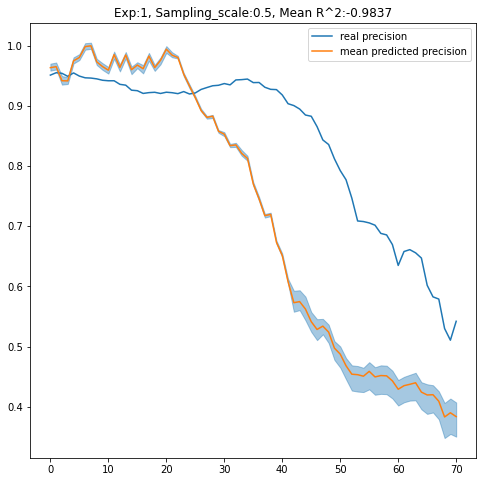

Exp 2, Trial 1
1000/1000 precision:0.9057 drift:-0.0309

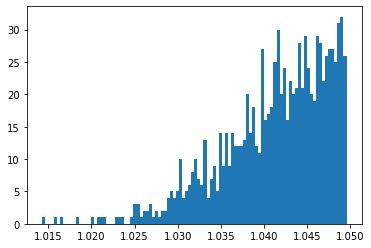

Model R^2: 0.9963554825147558
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.878e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:15:13   Log-Likelihood:                          1347.8
No. Observations:                1000   AIC:                                     -2682.
Df Residuals:                     993   BIC:                                     -2647.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.5150
R2: 0.125688193535903


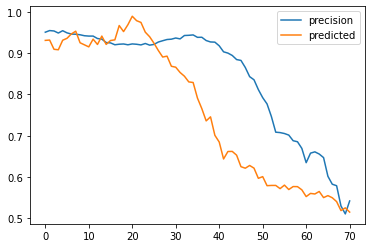

Exp 2, Trial 2
1000/1000 precision:0.9390 drift:-0.0282

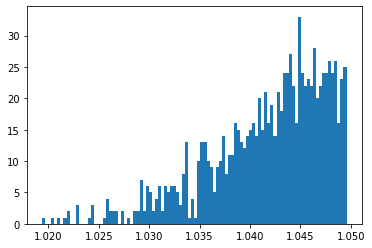

Model R^2: 0.9964206175561228
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.949e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:18:06   Log-Likelihood:                          1356.4
No. Observations:                1000   AIC:                                     -2699.
Df Residuals:                     993   BIC:                                     -2664.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.4953
R2: -0.032038734421840465


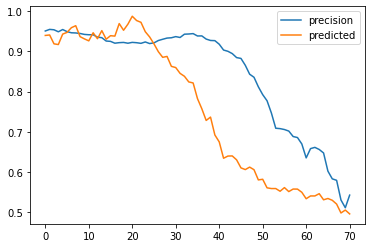

Exp 2, Trial 3
1000/1000 precision:0.9318 drift:-0.0279

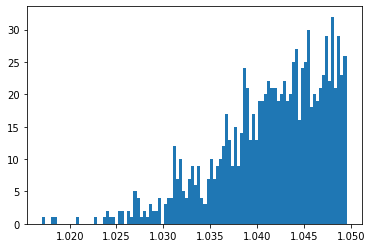

Model R^2: 0.9964951979059663
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.033e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:20:59   Log-Likelihood:                          1367.1
No. Observations:                1000   AIC:                                     -2720.
Df Residuals:                     993   BIC:                                     -2686.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.5176
R2: 0.13241466851644668


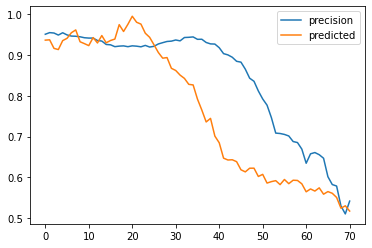

Exp 2, Trial 4
1000/1000 precision:0.9287 drift:-0.0360

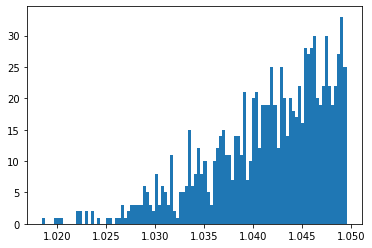

Model R^2: 0.996163292961731
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.683e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:23:51   Log-Likelihood:                          1321.9
No. Observations:                1000   AIC:                                     -2630.
Df Residuals:                     993   BIC:                                     -2595.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.5258
R2: 0.11968003292827978


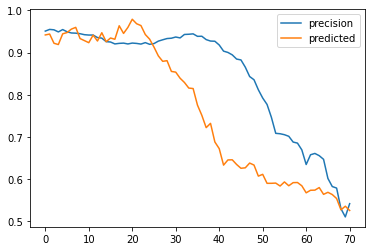

Exp 2, Trial 5
1000/1000 precision:0.9414 drift:-0.0322

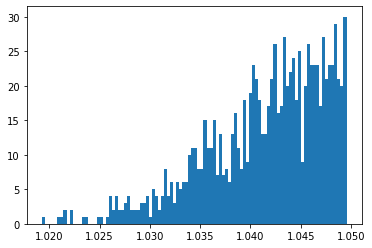

Model R^2: 0.99633031131808
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.851e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:26:44   Log-Likelihood:                          1344.1
No. Observations:                1000   AIC:                                     -2674.
Df Residuals:                     993   BIC:                                     -2640.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.5369
R2: 0.20334903688910977


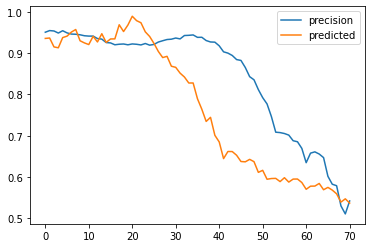

R2:0.1098 +- 0.1069
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : 0.10981863948957975
Mean R^2 (real,mean predict) : 0.11447572662742878


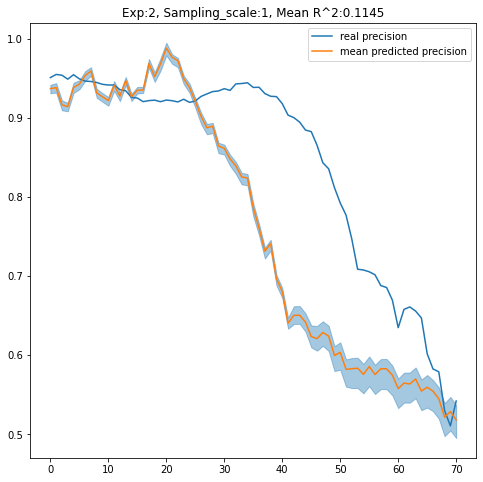

Exp 3, Trial 1
1000/1000 precision:0.9327 drift:-0.0286

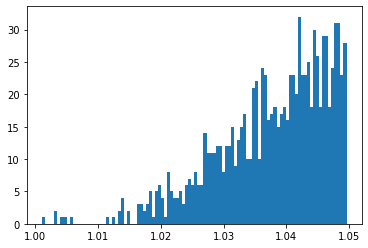

Model R^2: 0.9947335268802381
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.679e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:29:33   Log-Likelihood:                          1167.1
No. Observations:                1000   AIC:                                     -2320.
Df Residuals:                     993   BIC:                                     -2286.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.6659
R2: 0.47489930211392695


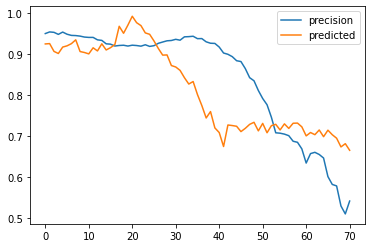

Exp 3, Trial 2
1000/1000 precision:0.9306 drift:-0.0279

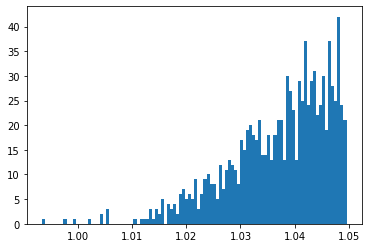

Model R^2: 0.9942996360407589
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.474e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:32:21   Log-Likelihood:                          1128.2
No. Observations:                1000   AIC:                                     -2242.
Df Residuals:                     993   BIC:                                     -2208.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.6576
R2: 0.3781945261569464


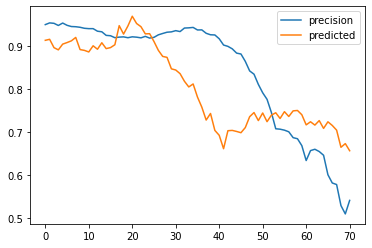

Exp 3, Trial 3
1000/1000 precision:0.9225 drift:-0.0361

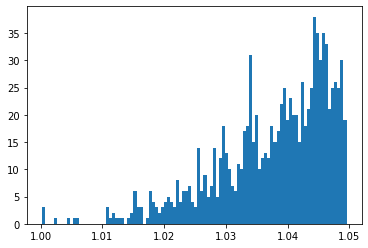

Model R^2: 0.9946921839854562
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.658e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:35:09   Log-Likelihood:                          1163.3
No. Observations:                1000   AIC:                                     -2313.
Df Residuals:                     993   BIC:                                     -2278.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.6635
R2: 0.44682018754562036


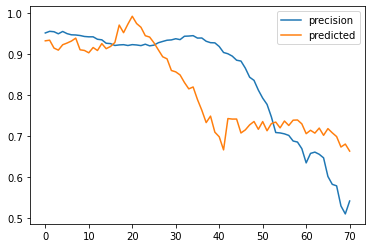

Exp 3, Trial 4
1000/1000 precision:0.9312 drift:-0.0288

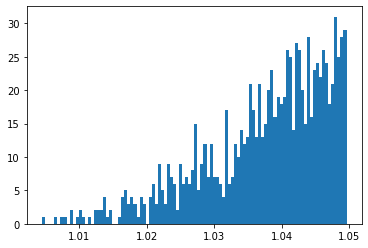

Model R^2: 0.9951338144040768
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.901e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:37:58   Log-Likelihood:                          1206.7
No. Observations:                1000   AIC:                                     -2399.
Df Residuals:                     993   BIC:                                     -2365.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.6559
R2: 0.4638887688565252


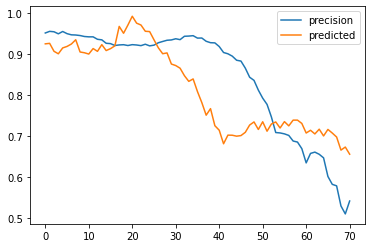

Exp 3, Trial 5
1000/1000 precision:0.9176 drift:-0.0288

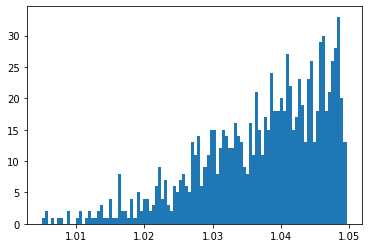

Model R^2: 0.99455135252378
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.589e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:40:46   Log-Likelihood:                          1150.7
No. Observations:                1000   AIC:                                     -2287.
Df Residuals:                     993   BIC:                                     -2253.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.6467
R2: 0.49045645047354214


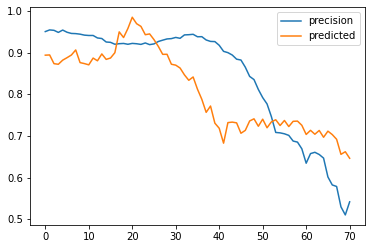

R2:0.4509 +- 0.0541
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : 0.45085184702931225
Mean R^2 (real,mean predict) : 0.4562299971762622


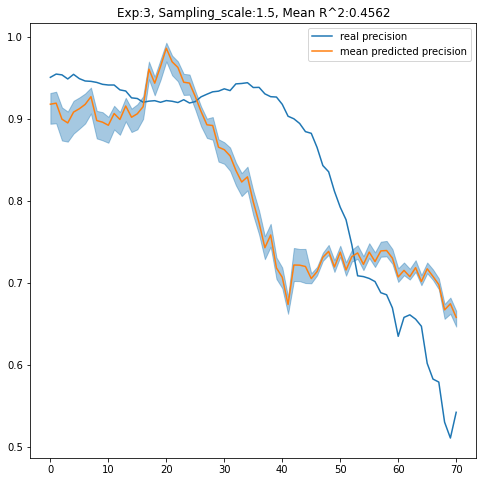

Exp 4, Trial 1
1000/1000 precision:0.8810 drift:-0.0298

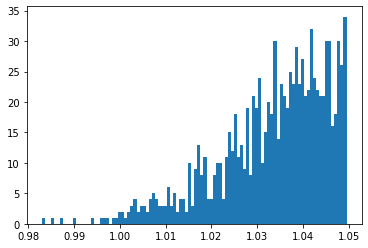

Model R^2: 0.9934937411463851
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.166e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:43:32   Log-Likelihood:                          1065.5
No. Observations:                1000   AIC:                                     -2117.
Df Residuals:                     993   BIC:                                     -2083.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7613
R2: 0.17146719541636202


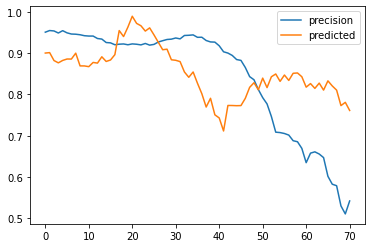

Exp 4, Trial 2
1000/1000 precision:0.9368 drift:-0.0325

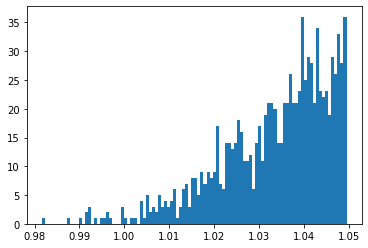

Model R^2: 0.9934452113881166
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.150e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:46:19   Log-Likelihood:                          1061.6
No. Observations:                1000   AIC:                                     -2109.
Df Residuals:                     993   BIC:                                     -2075.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8251
R2: -0.26375018655259597


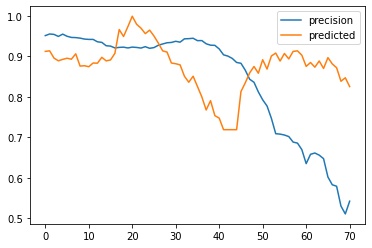

Exp 4, Trial 3
1000/1000 precision:0.8785 drift:-0.0314

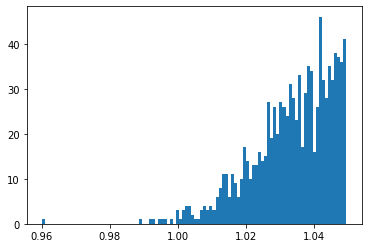

Model R^2: 0.9932274200239786
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.080e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:49:05   Log-Likelihood:                          1045.3
No. Observations:                1000   AIC:                                     -2077.
Df Residuals:                     993   BIC:                                     -2042.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7279
R2: 0.3237233812918907


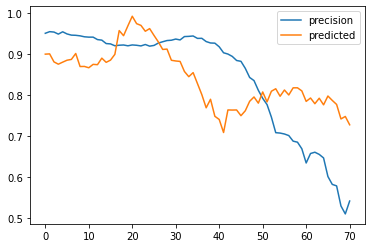

Exp 4, Trial 4
1000/1000 precision:0.9096 drift:-0.0311

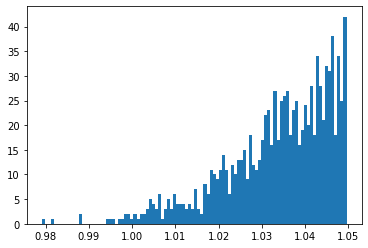

Model R^2: 0.9932193968506621
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.078e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:51:52   Log-Likelihood:                          1044.6
No. Observations:                1000   AIC:                                     -2075.
Df Residuals:                     993   BIC:                                     -2041.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7661
R2: 0.1738390291842331


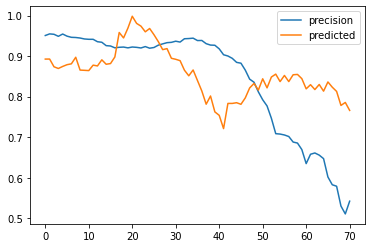

Exp 4, Trial 5
1000/1000 precision:0.9297 drift:-0.0298

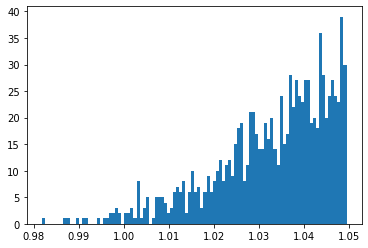

Model R^2: 0.9928911070765611
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.981e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:54:38   Log-Likelihood:                          1021.6
No. Observations:                1000   AIC:                                     -2029.
Df Residuals:                     993   BIC:                                     -1995.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7669
R2: 0.10787112639760676


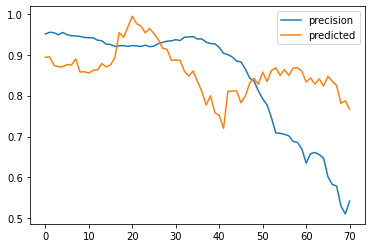

R2:0.1026 +- 0.2723
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : 0.10263010914749933
Mean R^2 (real,mean predict) : 0.12375738472667874


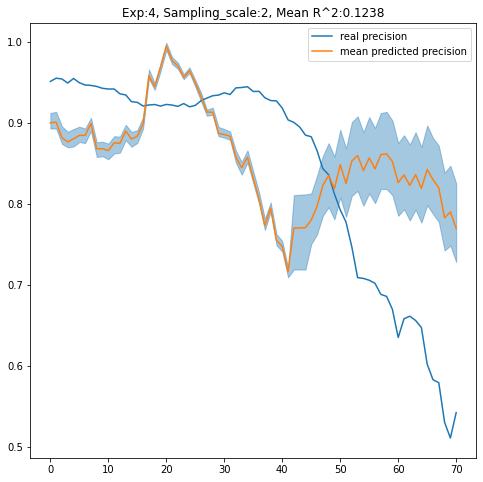

Exp 5, Trial 1
1000/1000 precision:0.9304 drift:-0.0337

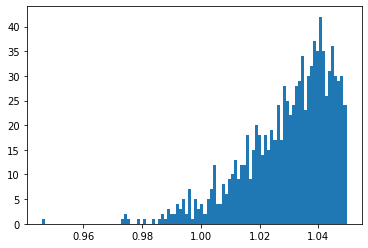

Model R^2: 0.9925056127789578
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.879e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:57:22   Log-Likelihood:                          998.55
No. Observations:                1000   AIC:                                     -1983.
Df Residuals:                     993   BIC:                                     -1949.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8653
R2: -0.6605452950960617


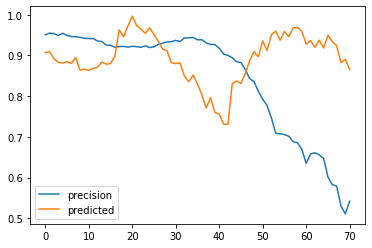

Exp 5, Trial 2
1000/1000 precision:0.8966 drift:-0.0377

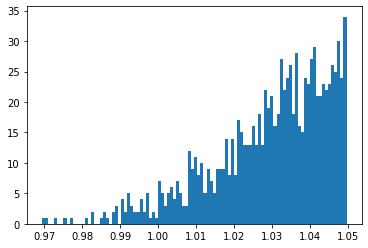

Model R^2: 0.9920995116327108
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.781e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:00:06   Log-Likelihood:                          972.27
No. Observations:                1000   AIC:                                     -1931.
Df Residuals:                     993   BIC:                                     -1896.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8304
R2: -0.3182647194342283


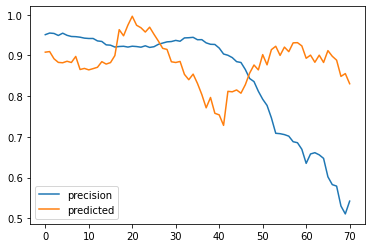

Exp 5, Trial 3
1000/1000 precision:0.9315 drift:-0.0380

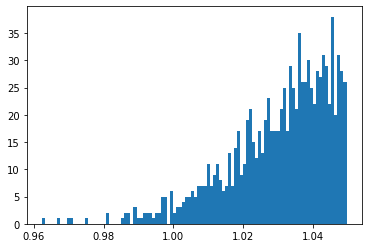

Model R^2: 0.9922722219687455
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.821e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:02:50   Log-Likelihood:                          982.64
No. Observations:                1000   AIC:                                     -1951.
Df Residuals:                     993   BIC:                                     -1917.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7938
R2: -0.10196946070862367


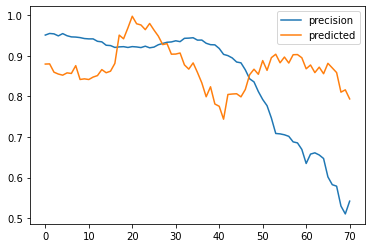

Exp 5, Trial 4
1000/1000 precision:0.9217 drift:-0.0292

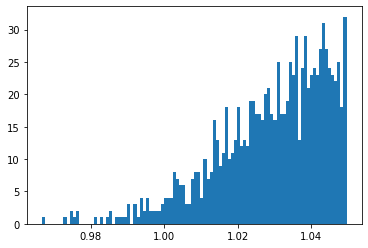

Model R^2: 0.9920380552932694
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.768e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:05:34   Log-Likelihood:                          968.64
No. Observations:                1000   AIC:                                     -1923.
Df Residuals:                     993   BIC:                                     -1889.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8116
R2: -0.12322368245966975


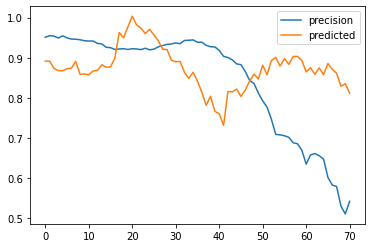

Exp 5, Trial 5
1000/1000 precision:0.9254 drift:-0.0315

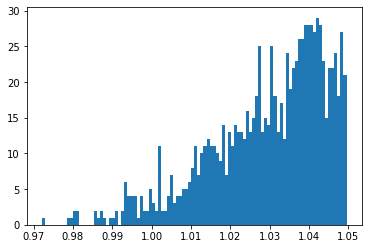

Model R^2: 0.9922903431699698
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.826e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:08:17   Log-Likelihood:                          984.48
No. Observations:                1000   AIC:                                     -1955.
Df Residuals:                     993   BIC:                                     -1921.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8458
R2: -0.36770062763642275


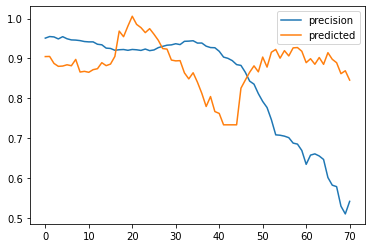

R2:-0.3143 +- 0.2802
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : -0.31434075706700126
Mean R^2 (real,mean predict) : -0.298547286736109


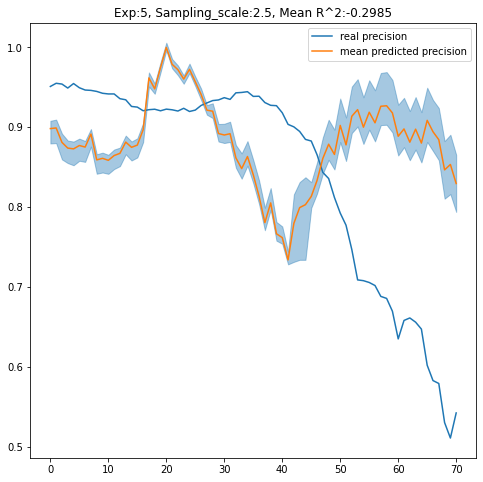

Exp 6, Trial 1
1000/1000 precision:0.9297 drift:-0.0356

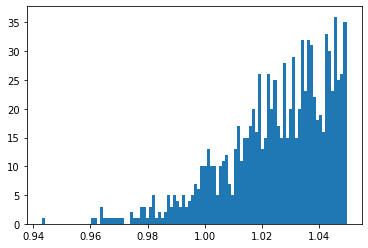

Model R^2: 0.9912745462707926
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.612e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:10:58   Log-Likelihood:                          926.86
No. Observations:                1000   AIC:                                     -1840.
Df Residuals:                     993   BIC:                                     -1805.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7549
R2: 0.4273575704188717


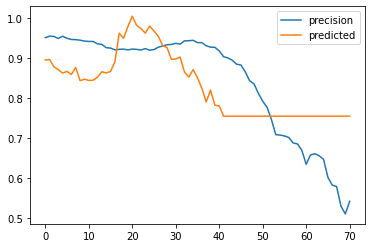

Exp 6, Trial 2
1000/1000 precision:0.9094 drift:-0.0314

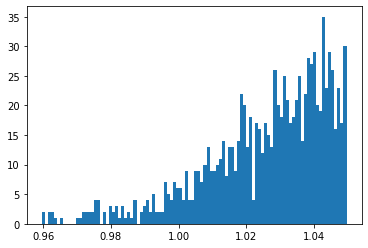

Model R^2: 0.9904607348939573
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.473e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:13:39   Log-Likelihood:                          881.57
No. Observations:                1000   AIC:                                     -1749.
Df Residuals:                     993   BIC:                                     -1715.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8796
R2: -0.6885629975347214


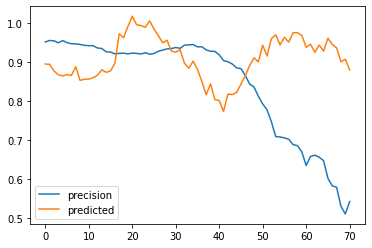

Exp 6, Trial 3
1000/1000 precision:0.8947 drift:-0.0336

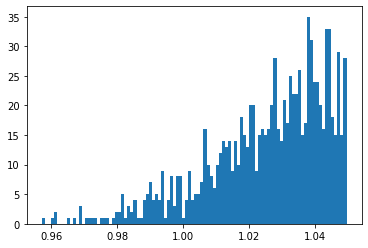

Model R^2: 0.9911187445286419
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.583e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:16:20   Log-Likelihood:                          917.65
No. Observations:                1000   AIC:                                     -1821.
Df Residuals:                     993   BIC:                                     -1787.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.8666
R2: -0.6832004183467792


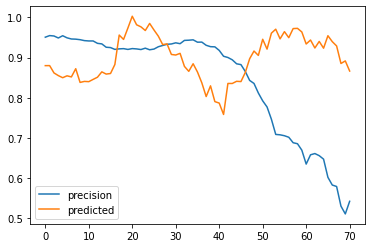

Exp 6, Trial 4
1000/1000 precision:0.9138 drift:-0.0284

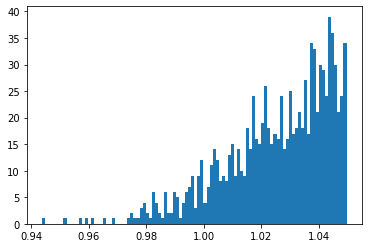

Model R^2: 0.9903364236986069
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.454e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:19:03   Log-Likelihood:                          875.45
No. Observations:                1000   AIC:                                     -1737.
Df Residuals:                     993   BIC:                                     -1703.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7462
R2: 0.4306058375537094


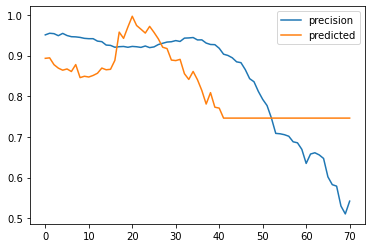

Exp 6, Trial 5
1000/1000 precision:0.9318 drift:-0.0267

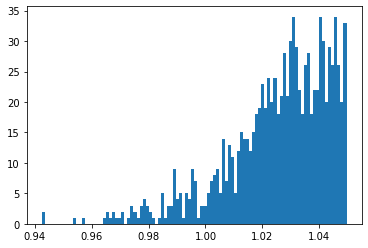

Model R^2: 0.9907471684022909
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.519e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:21:44   Log-Likelihood:                          897.10
No. Observations:                1000   AIC:                                     -1780.
Df Residuals:                     993   BIC:                                     -1746.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7279
R2: 0.4199184339410932


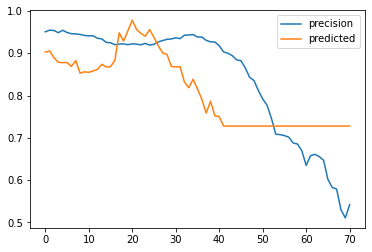

R2:-0.0188 +- 0.7549
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : -0.018776314793565275
Mean R^2 (real,mean predict) : 0.17816368819801454


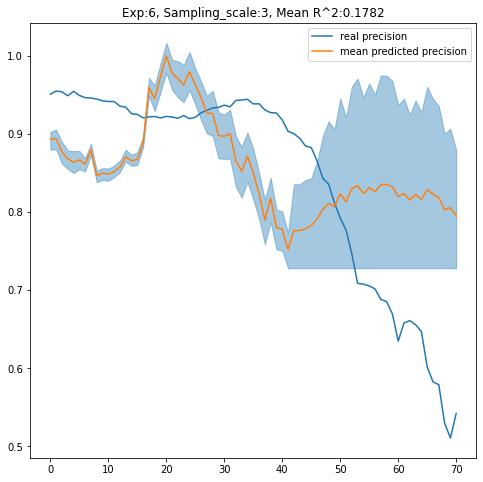

Exp 7, Trial 1
1000/1000 precision:0.9261 drift:-0.0266

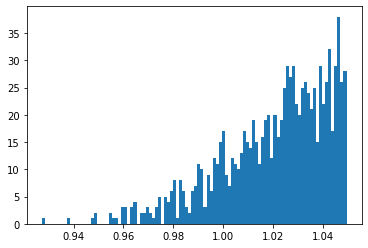

Model R^2: 0.989979214953155
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.401e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:24:23   Log-Likelihood:                          861.98
No. Observations:                1000   AIC:                                     -1710.
Df Residuals:                     993   BIC:                                     -1676.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7628
R2: 0.40203657424666617


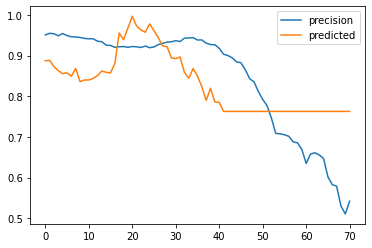

Exp 7, Trial 2
1000/1000 precision:0.9178 drift:-0.0356

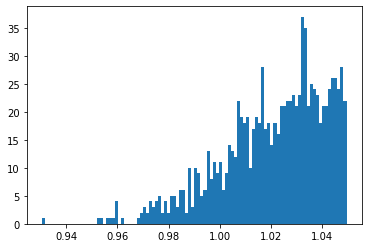

Model R^2: 0.9906902622640172
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.510e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:27:01   Log-Likelihood:                          898.36
No. Observations:                1000   AIC:                                     -1783.
Df Residuals:                     993   BIC:                                     -1748.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7405
R2: 0.4038282117079953


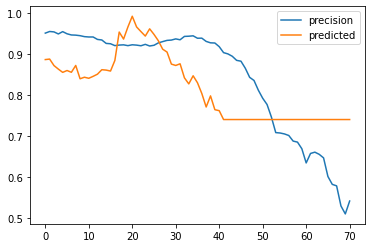

Exp 7, Trial 3
1000/1000 precision:0.8947 drift:-0.0307

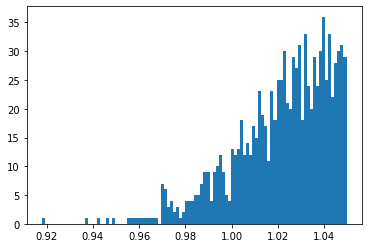

Model R^2: 0.9902295563108515
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.438e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:29:40   Log-Likelihood:                          873.58
No. Observations:                1000   AIC:                                     -1733.
Df Residuals:                     993   BIC:                                     -1699.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.9196
R2: -1.1770013781091717


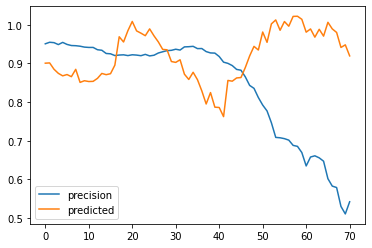

Exp 7, Trial 4
1000/1000 precision:0.8932 drift:-0.0288

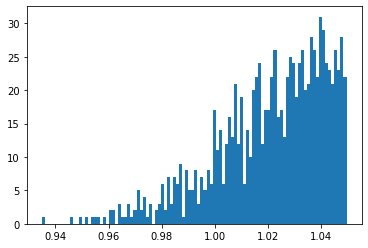

Model R^2: 0.9900232429817937
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.408e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:32:18   Log-Likelihood:                          863.43
No. Observations:                1000   AIC:                                     -1713.
Df Residuals:                     993   BIC:                                     -1679.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7543
R2: 0.39814506619709067


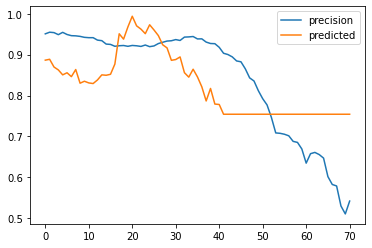

Exp 7, Trial 5
1000/1000 precision:0.9257 drift:-0.0330

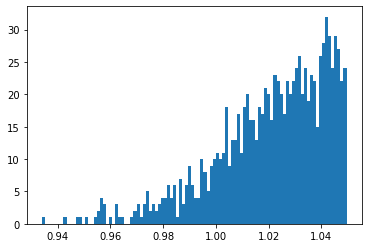

Model R^2: 0.989481406105957
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.334e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:34:57   Log-Likelihood:                          837.11
No. Observations:                1000   AIC:                                     -1660.
Df Residuals:                     993   BIC:                                     -1626.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7525
R2: 0.43596530467682193


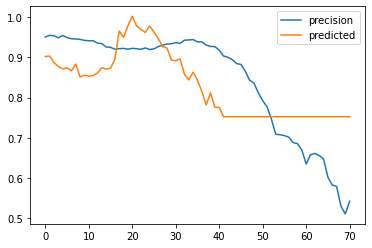

R2:0.0926 +- 0.8800
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : 0.09259475574388047
Mean R^2 (real,mean predict) : 0.26932835546009215


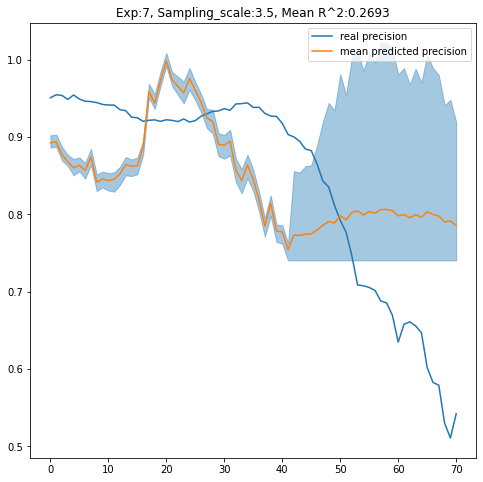

Exp 8, Trial 1
1000/1000 precision:0.8101 drift:-0.0280

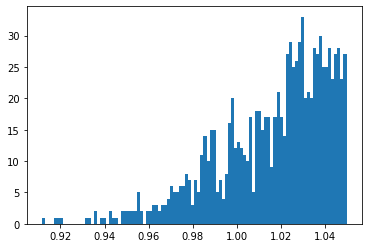

Model R^2: 0.9879154896435205
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.160e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:37:33   Log-Likelihood:                          772.50
No. Observations:                1000   AIC:                                     -1531.
Df Residuals:                     993   BIC:                                     -1497.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7827
R2: 0.3560904131127649


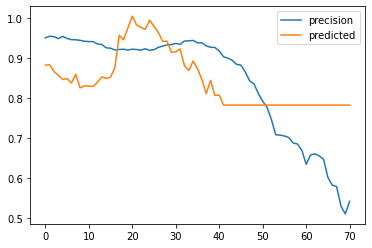

Exp 8, Trial 2
1000/1000 precision:0.9057 drift:-0.0327

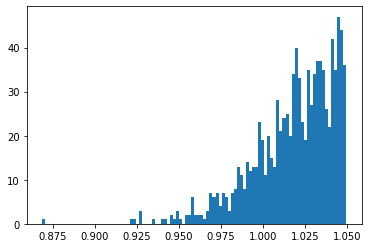

Model R^2: 0.9881555694508792
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.183e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:40:10   Log-Likelihood:                          780.48
No. Observations:                1000   AIC:                                     -1547.
Df Residuals:                     993   BIC:                                     -1513.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7620
R2: 0.37660126677538674


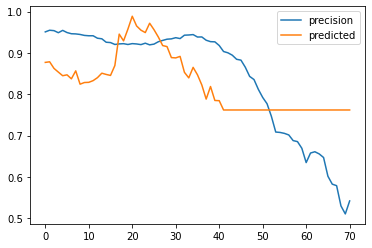

Exp 8, Trial 3
1000/1000 precision:0.8913 drift:-0.0236

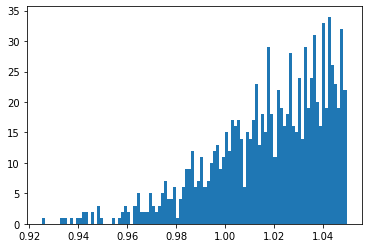

Model R^2: 0.9889643505978841
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.271e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:42:47   Log-Likelihood:                          816.53
No. Observations:                1000   AIC:                                     -1619.
Df Residuals:                     993   BIC:                                     -1585.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.9356
R2: -1.410827005863403


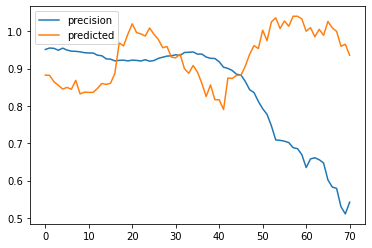

Exp 8, Trial 4
1000/1000 precision:0.9169 drift:-0.0308

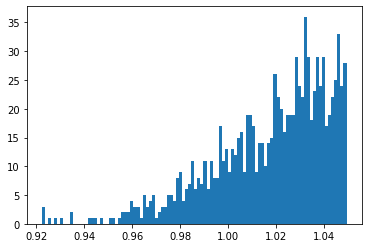

Model R^2: 0.9896081600710753
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.351e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:45:24   Log-Likelihood:                          846.62
No. Observations:                1000   AIC:                                     -1679.
Df Residuals:                     993   BIC:                                     -1645.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7782
R2: 0.39773546979406893


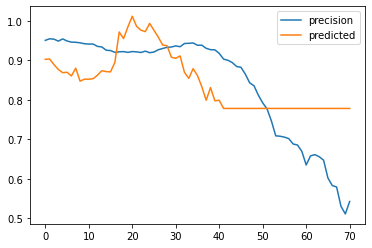

Exp 8, Trial 5
1000/1000 precision:0.8551 drift:-0.0269

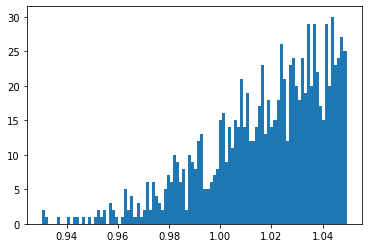

Model R^2: 0.9890186209171675
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.278e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:48:01   Log-Likelihood:                          818.72
No. Observations:                1000   AIC:                                     -1623.
Df Residuals:                     993   BIC:                                     -1589.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7552
R2: 0.38913655418496806


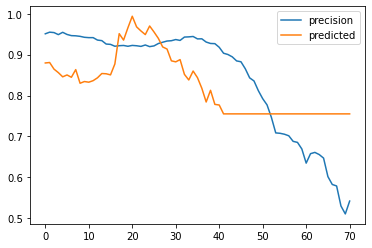

R2:0.0217 +- 0.9929
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : 0.021747339600757143
Mean R^2 (real,mean predict) : 0.20596369803579462


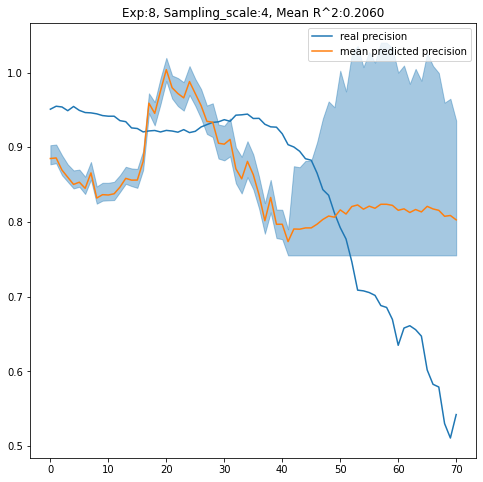

Exp 9, Trial 1
1000/1000 precision:0.9003 drift:-0.0327

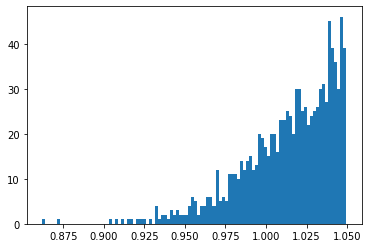

Model R^2: 0.9871137147973721
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.087e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:50:37   Log-Likelihood:                          742.80
No. Observations:                1000   AIC:                                     -1472.
Df Residuals:                     993   BIC:                                     -1437.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7699
R2: 0.3673523858847233


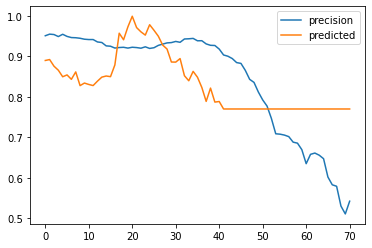

Exp 9, Trial 2
1000/1000 precision:0.8667 drift:-0.0253

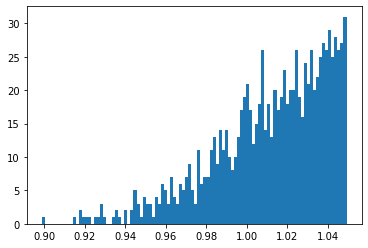

Model R^2: 0.9874023431084923
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.112e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:53:11   Log-Likelihood:                          755.64
No. Observations:                1000   AIC:                                     -1497.
Df Residuals:                     993   BIC:                                     -1463.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7967
R2: 0.3188225173584712


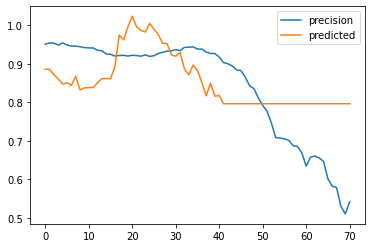

Exp 9, Trial 3
1000/1000 precision:0.9200 drift:-0.0291

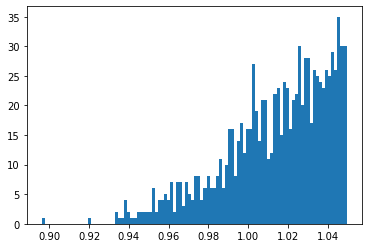

Model R^2: 0.9877678393104284
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.146e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:55:46   Log-Likelihood:                          768.58
No. Observations:                1000   AIC:                                     -1523.
Df Residuals:                     993   BIC:                                     -1489.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7724
R2: 0.3953815147822898


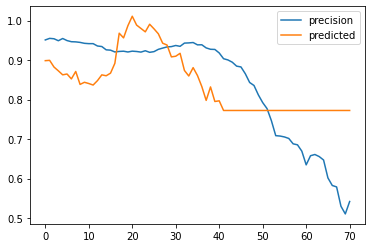

Exp 9, Trial 4
1000/1000 precision:0.9120 drift:-0.0338

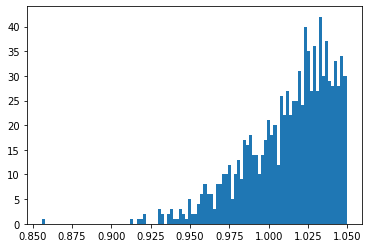

Model R^2: 0.9877051026187891
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.140e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:58:20   Log-Likelihood:                          767.19
No. Observations:                1000   AIC:                                     -1520.
Df Residuals:                     993   BIC:                                     -1486.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7560
R2: 0.3908189983966539


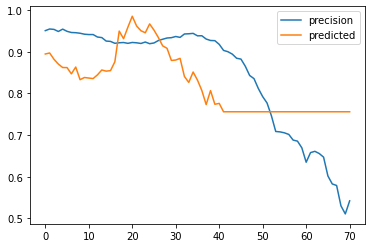

Exp 9, Trial 5
1000/1000 precision:0.8578 drift:-0.0285

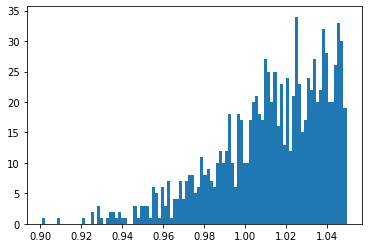

Model R^2: 0.9871936463799118
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.094e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:00:55   Log-Likelihood:                          746.73
No. Observations:                1000   AIC:                                     -1479.
Df Residuals:                     993   BIC:                                     -1445.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7658
R2: 0.3917039165649404


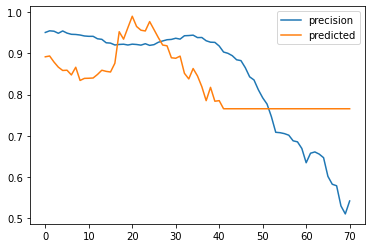

R2:0.3728 +- 0.0399
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : 0.3728158665974157
Mean R^2 (real,mean predict) : 0.38194069670583397


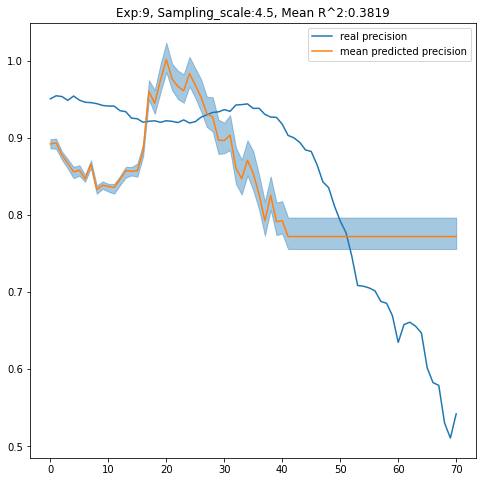

Exp 10, Trial 1
1000/1000 precision:0.8690 drift:-0.0322

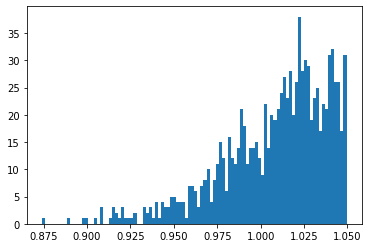

Model R^2: 0.9867162295081356
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.054e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:03:27   Log-Likelihood:                          732.64
No. Observations:                1000   AIC:                                     -1451.
Df Residuals:                     993   BIC:                                     -1417.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7670
R2: 0.34265357358602433


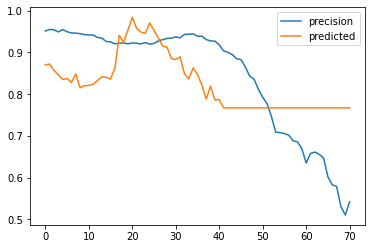

Exp 10, Trial 2
1000/1000 precision:0.8944 drift:-0.0327

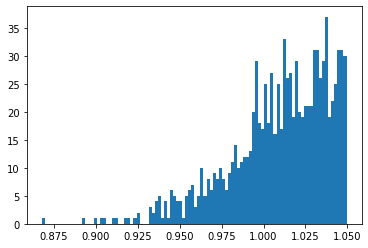

Model R^2: 0.9872039293356482
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.094e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:06:00   Log-Likelihood:                          750.42
No. Observations:                1000   AIC:                                     -1487.
Df Residuals:                     993   BIC:                                     -1452.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.9620
R2: -2.1096560206742843


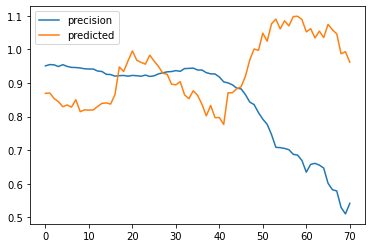

Exp 10, Trial 3
1000/1000 precision:0.8429 drift:-0.0273

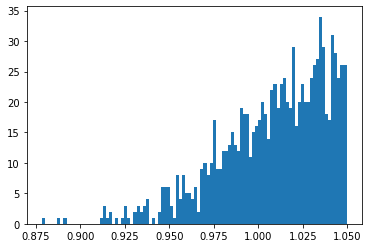

Model R^2: 0.9864840446013633
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.035e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:08:33   Log-Likelihood:                          724.26
No. Observations:                1000   AIC:                                     -1435.
Df Residuals:                     993   BIC:                                     -1400.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.9808
R2: -2.22849676651165


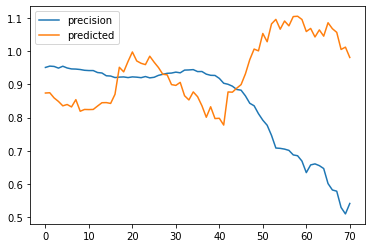

Exp 10, Trial 4
1000/1000 precision:0.9252 drift:-0.0280

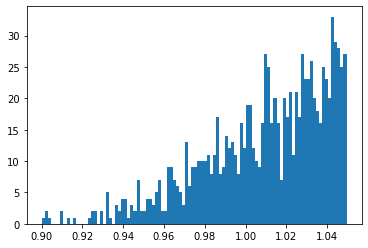

Model R^2: 0.9863580692302104
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.026e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:11:07   Log-Likelihood:                          718.53
No. Observations:                1000   AIC:                                     -1423.
Df Residuals:                     993   BIC:                                     -1389.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7933
R2: 0.32570722014765563


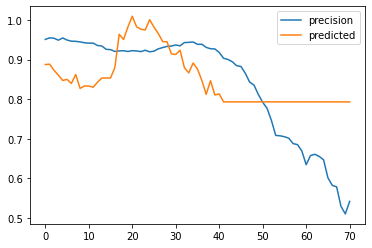

Exp 10, Trial 5
1000/1000 precision:0.7987 drift:-0.0314

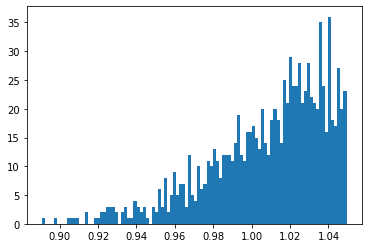

Model R^2: 0.9870466696859163
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.081e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:13:40   Log-Likelihood:                          745.22
No. Observations:                1000   AIC:                                     -1476.
Df Residuals:                     993   BIC:                                     -1442.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


71/71 precision:0.5421 predicted:0.7725
R2: 0.37029205571734203


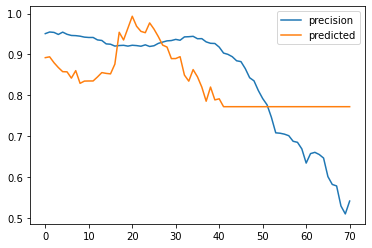

R2:-0.6599 +- 1.7087
Trial:2.0000 +- 1.9600
Mean R^2 (sum(r2)/N) : -0.6598999875469824
Mean R^2 (real,mean predict) : -0.2863454508773524


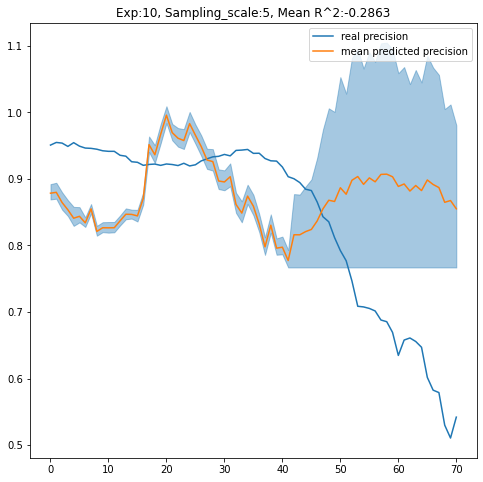

In [ ]:
seed_everything()

scales = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
for Exp in range(len(scales)):
    df3 = {}
    result_data = {}
    result_data['R2'] = []
    result_data['Trial'] = []
    #result_dfs = []
    experimant_count = 5
    scale = scales[Exp]
    for trial in range(experimant_count):
        print(f'Exp {Exp+1}, Trial {trial+1}')
        model = ppm_build2(scale = scale,epoch =1000)
        R2, result_df = test2(model)
        #if R2 > -10.0:
        result_data['R2'].append(R2)
        result_data['Trial'].append(trial)
        df3['real precision'] = result_df['precision'].values
        df3[f'predicted {trial}'] = result_df['predicted'].values
        #else:
        #    print('==== Discard this experiment.====')

    result_visualization(Exp,scale,df3,result_data)